# classification_exercises - The notebook will contain all your work 
                          # as you move through the exercises

  # and acquire.py - The acquire.py file should contain the final functions

# Data Acquisition

            READ FROM EXTERNAL SOURCE... NOT PYDATA
            get from BAYES REPO - pull in as csv
1 - Use a python module containing datasets as a source from the iris data. 
Create a pandas dataframe, df_iris, from this data.

In [1]:
import pandas as pd
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

df = pd.read_sql('SELECT * FROM measurements', get_connection('iris_db'))

df.head(5)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


- print the first 3 rows

In [2]:
print(df.head(3))

   measurement_id  sepal_length  sepal_width  petal_length  petal_width  \
0               1           5.1          3.5           1.4          0.2   
1               2           4.9          3.0           1.4          0.2   
2               3           4.7          3.2           1.3          0.2   

   species_id  
0           1  
1           1  
2           1  


- print the number of rows and columns (shape)

In [3]:
print(df.shape)

(150, 6)


- print the column names

In [4]:
# method 1
list(df.columns)

['measurement_id',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species_id']

In [5]:
# method 2
# iterating the columns 
for col in df.columns: 
    print(col) 

measurement_id
sepal_length
sepal_width
petal_length
petal_width
species_id


- print the data type of each column

In [6]:
df.dtypes

measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_id          int64
dtype: object

- print the summary statistics for each of the numeric variables. 
Would you recommend rescaling the data based on these statistics?
    No, the various measurements are all near scale

In [7]:
df.describe()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333,2.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


2 - Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [8]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

#df_excel = pd.read_excel('Excel_Exercises.xlsx') #this one only defaults to 1st worksheet
df_excel = pd.read_excel('Excel_Exercises.xlsx','Table1_CustDetails') # this will open specific wksheet

print("Column headings:")
print(df_excel.columns)

Column headings:
Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn'],
      dtype='object')


- assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
# method 1 - head
df_excel_sample = df_excel.head(100)

In [10]:
df_excel_sample.shape

(100, 12)

In [11]:
# method 2 - iloc
df_excel_sample = df_excel.iloc[:100]

In [12]:
df_excel_sample.shape

(100, 12)

- print the number of rows of your original dataframe

In [13]:
print(df_excel.count())

customer_id          7049
gender               7049
is_senior_citizen    7049
partner              7049
dependents           7049
phone_service        7049
internet_service     7049
contract_type        7049
payment_type         7049
monthly_charges      7049
total_charges        7038
churn                7049
dtype: int64


- print the first 5 column names

In [14]:
# method 1: get list of column name
list(df_excel.columns.values[:5])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [15]:
# method 2 
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [16]:
# method 3 - works for a later ploting exercise (Jeff R showed in class)
# list(df_excel.columns[(df_excel.dtypes == object) | (df.nunique()<5)])

In [17]:
list(df_excel.columns[(df_excel.dtypes == object)])

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [18]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [19]:
# another way to get column names
df_excel.dtypes.index

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

# - print the column names that have a data type of object

In [20]:
     ### a way to print DF for specific DTypes
# df_excel.select_dtypes(['float64','int64'])
# [key for key in dict(df_excel.dtypes) if dict(df_excel.dtypes)[key] in ['object']]
#df_excel.select_dtypes.index(['object'])

# df_excel.dtypes == 'object'
# df_excel[key for key in dict(df_excel.dtypes) if dict(df_excel.dtypes)[key] in ['float64', 'int64']]

# df_excel.dtypes.index

# df_excel.select_dtypes(include=['float64','int64']).min()

# df_excel.dtypes[df_excel.dtypes == 'object']

# df_excel.select_dtypes(include=['float64'])  # 'float64', 'int64']

- compute the range for each of the numeric variables.

In [21]:
   # this might not be exactly what was wamted
df_excel.select_dtypes(include=['float64','int64']).index

RangeIndex(start=0, stop=7049, step=1)

In [22]:
df_excel_sample.select_dtypes(['int64', 'float64']).max() - df_excel_sample.select_dtypes(['int64', 'float64']).min()

is_senior_citizen       1.00
phone_service           2.00
internet_service        2.00
contract_type           2.00
monthly_charges        97.40
total_charges        8476.85
dtype: float64

3 - Read the data from this google sheet (https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe, df_google

In [23]:
# installed already during class 10-22
# !pip install pandas-profiling

In [24]:
# import numpy as np
# import pandas as pd
# import pandas_profiling

In [25]:
# pandas_profiling.ProfileReport(df_excel)

In [26]:
import pandas as pd

# sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- print the first 3 rows

In [27]:
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- print the number of rows and columns

In [28]:
df_googlesheet.shape

(891, 12)

- print the column names

In [29]:
list(df_googlesheet.columns.values[:])

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

- print the data type of each column

In [30]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- print the summary statistics for each of the numeric variables

In [31]:
df_googlesheet.select_dtypes(['int64', 'float64']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- print the unique values for each of your categorical variables
     (looking for unique value count... TICKET HAS 681 ! 
     This would not make sense necessarily to print out with "count_values" Fx

In [32]:
df_g_sheet_objects = df_googlesheet.select_dtypes(['object'])

In [33]:
df_g_sheet_objects.nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

- In a new python module, acquire.py:

In [34]:
import acquire

1 - get_titanic_data: returns the titanic data from the codeup data science database as a pandas data frame.

In [35]:
tito = acquire.get_titanic_data()
tito.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


2 - get_iris_data: returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids.

In [36]:
iro = acquire.get_iris_data()
iro.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,setosa,1,5.1,3.5,1.4,0.2,1
1,1,setosa,2,4.9,3.0,1.4,0.2,1
2,1,setosa,3,4.7,3.2,1.3,0.2,1
3,1,setosa,4,4.6,3.1,1.5,0.2,1
4,1,setosa,5,5.0,3.6,1.4,0.2,1


# DATA PREP Exercises
- to be done in JNB prior to transforming into Fx's to be placed in a prepare.py script file

In [37]:
1 - Iris Data

a - Use the function defined in acquire.py to load the iris data.
b - Drop the species_id and measurement_id columns.
c - Rename the species_name column to just species.
d - Encode the species name using a sklearn label encoder. Research the inverse_transform method 
of the label encoder. How might this be useful?
e - Create a function named prep_iris that accepts the untransformed iris data, and returns the data
with the transformations above applied.

SyntaxError: invalid syntax (<ipython-input-37-205e993921db>, line 1)

In [ ]:
# a - Use the function defined in acquire.py to load the iris data.

import acquire

iris_dp = acquire.get_iris_data()
iris_dp.head()

In [ ]:
# b - Drop the species_id and measurement_id columns

iris_dp.drop(columns=['species_id', 'measurement_id'], inplace=True)
iris_dp.head()

In [ ]:
# c - Rename the species_name column to just species
        # ex:  df.rename(columns={'name': 'student'})  < {currentName : newName} >
# DONT USE THIS with inplace=True in script !!!!
# this didn't work ??? iris_dp['species'] = iris_dp['species_name']
iris_dp = iris_dp.rename(columns={'species_name' : 'species'})

iris_dp.head()

In [ ]:
# d - Encode the species name using a sklearn label encoder. 
    # Research the inverse_transform method of the label encoder. 
 # ? How might this be useful?

            # d - check for any NaNs or Nulls first
iris_dp.species.value_counts(dropna=False)

In [ ]:
# d continued  
   # NOTES - must have NaNs and Nulls "ajudicated"
    #  steps are to FIT & TRANSFORM, can technically be done
     # all at once with fit_transform, but this shows the process more thoroughly

from sklearn import preprocessing

encoder = LabelEncoder()
encoder.fit(df.embarked)
df.embarked = encoder.transform(df.embarked)

df.embarked.head(10)



In [ ]:
# e - Create a function named prep_iris that accepts the untransformed iris data, and returns the data
    # with the transformations above applied.

In [ ]:
2 - Titanic Data

a - Use the function you defined in acquire.py to load the titanic data set.
b - Handle the missing values in the embark_town and embarked columns.
c - Remove the deck column.
d - Use a label encoder to transform the embarked column.
e - Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might
you not want to do this?
f - Create a function named prep_titanic that accepts the untransformed titanic data, and returns
the data with the transformations above applied.

a -
b - 
c - 
d -
e -
f -



Keep for other cut/paste
a -
b - 
c - 
d -
e -
f -



# Exploratory Analysis Exercises
 - Use the iris dataset.

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris # for iris data
from sklearn import datasets

#import env
# from acquire import get_iris_data # THIS KEPT GETTING A "Exception: Data must be 1-dimensional"
from acquire import get_iris_data_sklearn_edition
import prepare

df = get_iris_data_sklearn_edition()

In [44]:
iris = datasets.load_iris()

In [48]:
type(iris)

sklearn.utils.Bunch

In [49]:
from sklearn import datasets
iris = datasets.load_iris()

In [51]:
type(iris)

sklearn.utils.Bunch

In [53]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [54]:

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df = dataset

In [58]:
type(df)

pandas.core.frame.DataFrame

1 - Split data into train (70%) & test (30%) samples.


In [59]:
# using prepare.py
train, test = prepare.split_data(df)

In [60]:
train.shape, test.shape
# a .8 split ((120, 8), (30, 8))

((105, 5), (45, 5))

2 - Create a swarmplot using a melted dataframe of all your numeric variables. 
The x-axis is the variable name, the y-axis is the measure. Add another dimension
using color to represent species. Document takeaways from this visualization.

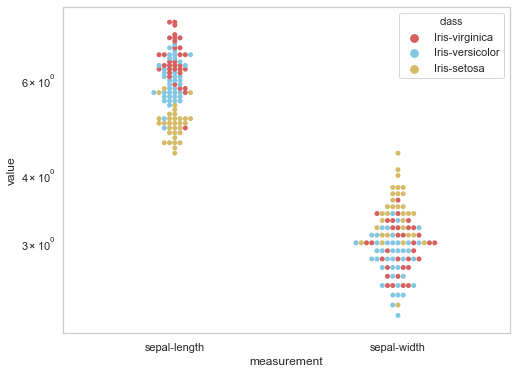

In [61]:
# just sepal dimensions

sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train[['sepal-length','sepal-width','class']], "class", var_name="measurement")

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="class",
              palette=["r", "c", "y"], data=df_melt)
p.set(yscale="log")

plt.show()

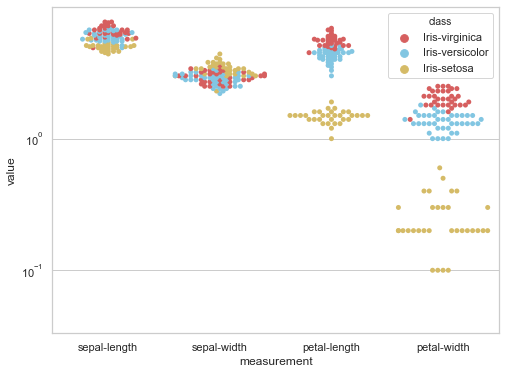

In [62]:
# both sepal and petal dimensions

sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train[['sepal-length','sepal-width','petal-length','petal-width','class']], "class", var_name="measurement")

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="class",
              palette=["r", "c", "y"], data=df_melt)
p.set(yscale="log")

plt.show()

3 - Create 4 subplots (2 rows x 2 columns) of scatterplots

 - sepal_length x sepal_width
 - petal_length x petal_width
 - sepal_area x petal_area
 - sepal_length x petal_length
 - Make your figure size 14 x 8. What are your takeaways?

4 - Create a heatmap of each variable layering correlation coefficient on top.

5 - Create a scatter matrix visualizing the interaction of each variable

6 - Is the sepal length significantly different in virginica compared 
to versicolor? 
Run an experiment to test this.

 - must include null hypothesis, alternative hypothesis, t-test, results, summary
 - H0: the difference in sepal length between virginica and versicolor is insignificant.
 - Ha: the difference in sepal length between virginica and versicolor is substantial.
 - We will test if the sepal length of virginica is significantly different than that of the versicolor.
 - If there is difference, then variable sepal_length is a good choice to keep as a feature.
 - We can use a t-test here, as sepal_length is somewhat normally distributed.